# Linear Discriminant Analysis

LDA is a classification algorithm learns by computing mean and variance of the input variables. The model computes conditional probabilities for each target class using Bayes Theorem in order to make predictions. The class with the highest probability is then chosen as the prediction.

LDA can also be used to conduct dimensionality reduction. The training process works in a way that uncovers the most discriminative classes between classes which can then be projected on a lower dimensional subfield. The transformed features can then be passed on as inputs to other classifiers such as Logistic Regression to make predictions.

# Assumptions

- Input Variables follow Gaussian distribution.
- Each predictor has the same variance
- Remove or transform extreme outliers


# Preprocessing

- Feature Scaling
- Norma

# 1. libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 2. Preprocessing

In [2]:
# Dataset
dataset = pd.read_csv('Wine.csv')

# Independent and dependent features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
# Take a look at the data
dataset.describe() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# 3. LDA


In [4]:
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

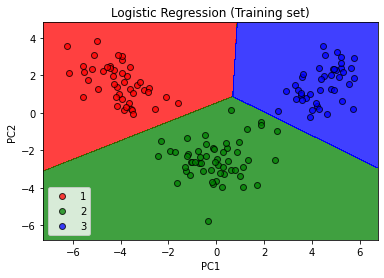

In [5]:
# Instantiate Logistic Regression
lgr = LogisticRegression(random_state = 0)

# Training 
lgr.fit(X_train, y_train)

# Visualize training results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lgr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j,edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#  4. Evaluate Performance on the Test Set

In [6]:
# Confusion Matrix/AUC/Classification Report 

def evaluate_model(lgr, X_test):
    
    y_pred = lgr.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["One", "Two", "Three"])
    plt.figure(figsize=(6, 6), edgecolor = 'black',
            linewidth = 1)
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(3) + 0.6, labels=["One", "Two", "Three"])
    plt.yticks(ticks=np.arange(3) + 0.6, labels=["One", "Two", "Three"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")
    print("Classification Report:\n----------------------\n", clr)
    
    
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, lgr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color = ListedColormap(('red', 'green', 'blue'))(i), label = j,edgecolor = 'black',
                linewidth = 1,
                alpha = 0.75)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

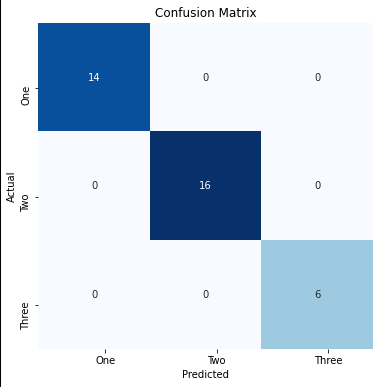

Accuracy: 100.0 %
Classification Report:
----------------------
               precision    recall  f1-score   support

         One       1.00      1.00      1.00        14
         Two       1.00      1.00      1.00        16
       Three       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



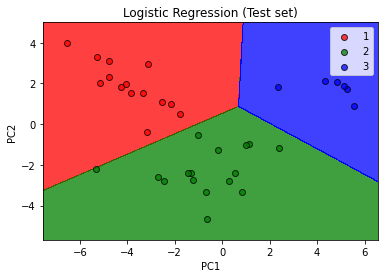

In [7]:
evaluate_model(lgr, X_test)